In [41]:
#  Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [15]:
df=pd.read_csv("C:\\Users\\CVR\\Desktop\\6652-COE\\Jupiter\\Datasets\\black-friday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [16]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [18]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [19]:
df.drop(['Product_ID','Gender','Age','City_Category','Stay_In_Current_City_Years'],axis=1, inplace=True)

In [20]:
df.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,10,0,3,NaN,NaN,8370
1,1000001,10,0,1,6.0,14.0,15200
2,1000001,10,0,12,NaN,NaN,1422
3,1000001,10,0,12,14.0,NaN,1057
4,1000002,16,0,8,NaN,NaN,7969


In [21]:
df.isnull().sum()

User_ID                    0
Occupation                 0
Marital_Status             0
Product_Category_1         0
Product_Category_2    173638
Product_Category_3    383247
Purchase                   0
dtype: int64

In [32]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mean(),inplace=True)

In [31]:
df['Product_Category_3'].fillna(df['Product_Category_3'].mean(),inplace=True)

In [33]:
df.isnull().sum()

User_ID               0
Occupation            0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
Purchase              0
dtype: int64

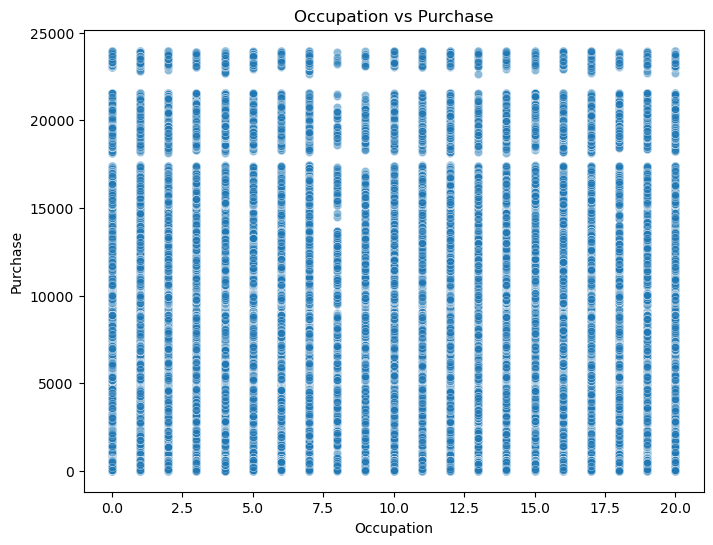

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Occupation',y='Purchase',data=df,alpha=0.5)
plt.title('Occupation vs Purchase')
plt.show()

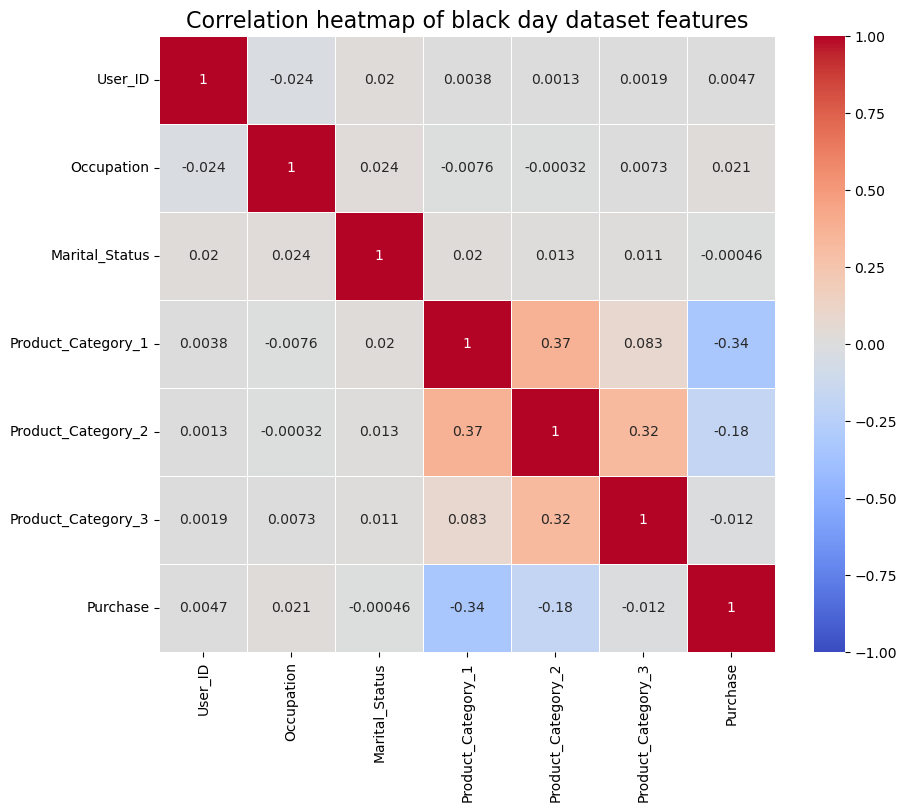

In [35]:
#Calculate Correlation matrix
corr_matrix=df.corr()
#setup the plot
plt.figure(figsize=(10,8))  #size of heatmap
#create heatmap
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1,center=0,square=True,linewidths=0.5)
#Add title
plt.title('Correlation heatmap of black day dataset features',fontsize=16)
plt.show()

In [43]:
#Prepare data
X=df[['Product_Category_1']]
y=df['Purchase']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
#Linear Regression
model=LinearRegression()
model.fit(X_train,y_train)
print(f"\nLinear Equation: Purchase={model.coef_[0]:.2f}*Product_Category_1+{model.intercept_:.2f}")


Linear Equation: Purchase=-439.33*Product_Category_1+11640.81


In [46]:
#Predict and Evaluate
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean absolute error:{mae:.2f} $100K")
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Root mean squared error:{rmse:.2f} $100K")
r2=r2_score(y_test,y_pred)
print(f"R-squared:{r2:.2f}")

Mean absolute error:3603.45 $100K
Root mean squared error:4710.61 $100K
R-squared:0.12


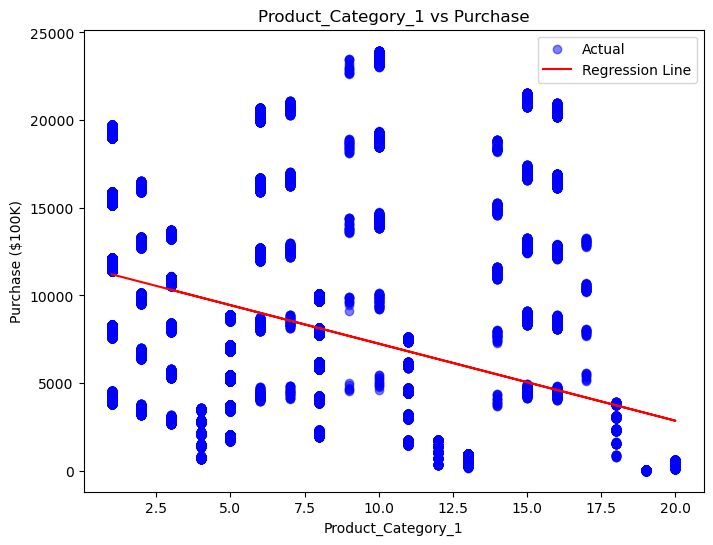

In [47]:
#Visualize
plt.figure(figsize=(8,6))
plt.scatter(X_test,y_test,color='blue',label='Actual',alpha=0.5)
plt.plot(X_test,y_pred,color='red',label='Regression Line')
plt.title("Product_Category_1 vs Purchase")
plt.xlabel('Product_Category_1')
plt.ylabel('Purchase ($100K)')
plt.legend()
plt.show()

In [48]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
#K-fold cross validation
kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LinearRegression()

#perform cross validation
scores=cross_val_score(model,X,y,cv=kf,scoring='r2')
print("Cross-validation scores",scores)
print("Average score:",scores.mean())

Cross-validation scores [0.11686324 0.11601767 0.11836944 0.12098976 0.11836442]
Average score: 0.11812090771665484


Linear Regression R²: 0.11686323991414715
Lasso Regression R²: 0.11686326871801422
Ridge Regression R²: 0.11686323994292913


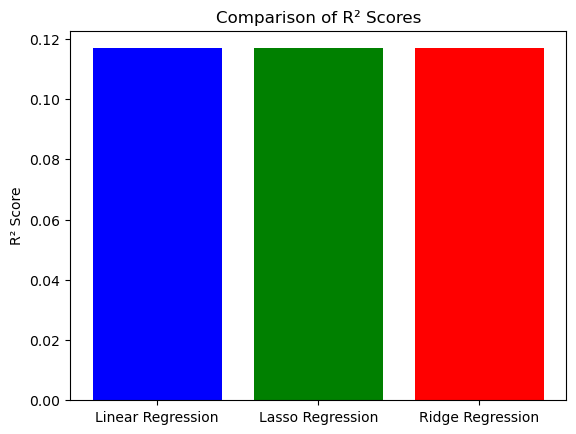

In [49]:

# Initialize the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)

# Train the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Predictions
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)

# Calculate R² scores
lr_r2 = r2_score(y_test, lr_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Print R² scores
print("Linear Regression R²:", lr_r2)
print("Lasso Regression R²:", lasso_r2)
print("Ridge Regression R²:", ridge_r2)

# Plot R² scores
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
r2_scores = [lr_r2, lasso_r2, ridge_r2]

plt.bar(models, r2_scores, color=['blue', 'green', 'red'])
plt.title('Comparison of R² Scores')
plt.ylabel('R² Score')
plt.show()